<a href="https://colab.research.google.com/github/zjorgx/Alura-Store-Latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



   🏪Tiendas  💵Ingreso Total
0    Tienda      1150880400
1  Tienda 2      1116343500
2  Tienda 3      1098019600
3  Tienda 4      1038375700 



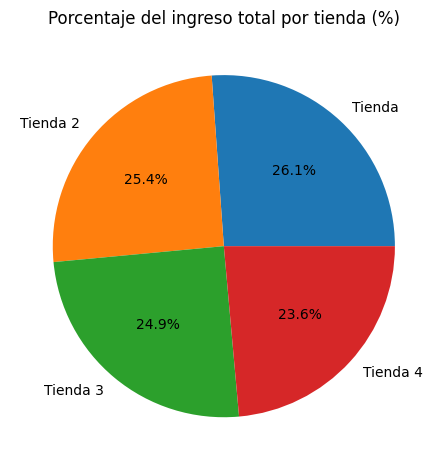

In [50]:
#Todo el ingreso por tienda
ingresoTotal = {"Tienda" : int(tienda['Precio'].sum()),
                "Tienda 2" : int(tienda2['Precio'].sum()),
                "Tienda 3" : int(tienda3['Precio'].sum()),
                "Tienda 4" : int(tienda4['Precio'].sum())}
dfIngresos = pd.DataFrame(list(ingresoTotal.items()), columns=['🏪Tiendas', '💵Ingreso Total'])
print(dfIngresos,"\n")

sumaTotal = sum(ingresoTotal.values())
porcentajes = lambda tienda : (tienda[1]*100)/sumaTotal
porcentajesTotal = {"Tienda" : porcentajes(list(ingresoTotal.items())[0]),
                    "Tienda 2" : porcentajes(list(ingresoTotal.items())[1]),
                    "Tienda 3" : porcentajes(list(ingresoTotal.items())[2]),
                    "Tienda 4" : porcentajes(list(ingresoTotal.items())[3])}

dfPorcentajes = pd.DataFrame(list(porcentajesTotal.items()), columns=['🏪Tiendas', 'Porcentaje'])

plt.title("Porcentaje del ingreso total por tienda (%)")
plt.pie(porcentajesTotal.values(), labels=porcentajesTotal.keys(), autopct='%1.1f%%')
plt.tight_layout()
plt.grid(True)

plt.show()


# 2. Ventas por categoría

                              Tienda     Tienda 2     Tienda 3     Tienda 4
Categoría del Producto                                                     
Artículos para el hogar   12698400.0   14746900.0   15060000.0   15074500.0
Deportes y diversión      39290000.0   34744500.0   35593100.0   33350100.0
Electrodomésticos        363685200.0  348567800.0  329237900.0  283260200.0
Electrónicos             429493500.0  410831100.0  410775800.0  409476100.0
Instrumentos musicales    91299000.0  104990300.0   77380900.0   75102400.0
Juguetes                  17995700.0   15945400.0   19401100.0   20262200.0
Libros                     8784900.0   10091200.0    9498700.0    9321300.0
Muebles                  187633700.0  176426300.0  201072100.0  192528900.0


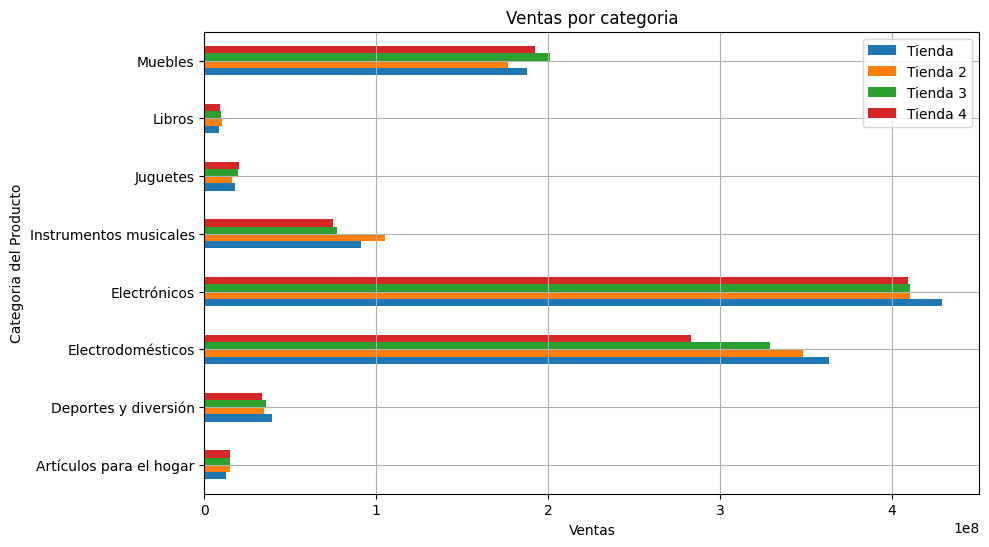

In [36]:
#Productos vendidos por categoria
ventaPorCategoria =  lambda x: x.groupby('Categoría del Producto')['Precio'].sum()

ventaTotalPorCategoria = {"Tienda" : ventaPorCategoria(tienda),
                          "Tienda 2" : ventaPorCategoria(tienda2),
                          "Tienda 3" : ventaPorCategoria(tienda3),
                          "Tienda 4" : ventaPorCategoria(tienda4)}

dfCategorias= pd.DataFrame(ventaTotalPorCategoria)
print(dfCategorias)

dfCategorias.plot(kind='barh', figsize=(10, 6))
plt.title("Ventas por categoria")
plt.xlabel("Ventas")
plt.ylabel("Categoria del Producto")
plt.grid(True)
plt.show()

# 3. Calificación promedio de la tienda


          Calificación
Tienda        3.976685
Tienda 2      4.037304
Tienda 3      4.048326
Tienda 4      3.995759


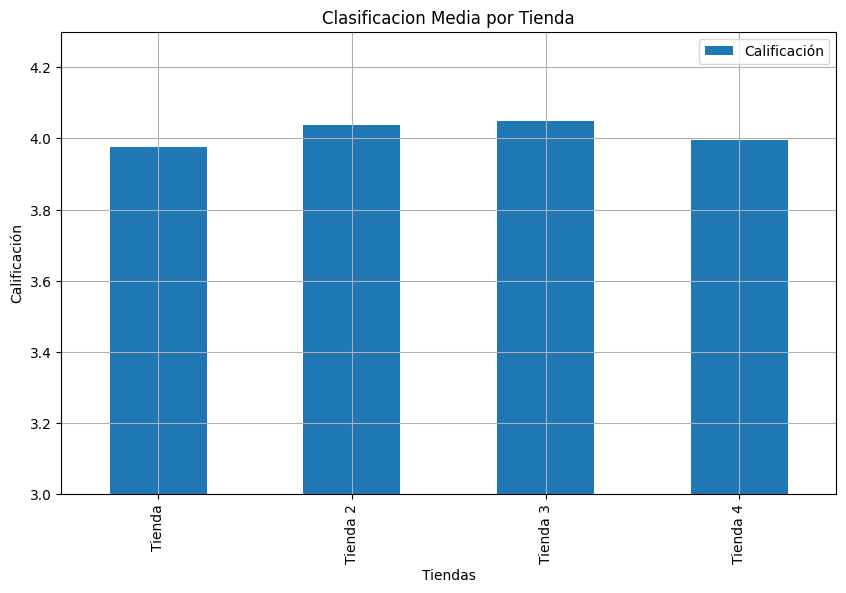

In [67]:
def calificacionPromedio(tienda):
  cantidad = len(tienda['Calificación'])
  promedio = sum(tienda['Calificación']) / cantidad
  return promedio

promediosCalificacion = {"Tienda" : calificacionPromedio(tienda),
                          "Tienda 2" : calificacionPromedio(tienda2),
                          "Tienda 3" : calificacionPromedio(tienda3),
                         "Tienda 4" : calificacionPromedio(tienda4)}
dfpromedios = pd.DataFrame.from_dict(promediosCalificacion, orient='index', columns=['Calificación'])
print(dfpromedios)

dfpromedios.plot(kind='bar', figsize=(10, 6))
plt.title("Clasificacion Media por Tienda")
plt.xlabel("Tiendas")
plt.ylabel("Calificación")
plt.ylim(3, 4.3)
plt.grid(True)
plt.show()


# 4. Productos más y menos vendidos

         ❌ PRODUCTO MENOS VENDIDO POR TIENDA
Tienda             Auriculares con micrófono
Tienda 2                       Juego de mesa
Tienda 3             Bloques de construcción
Tienda 4                  Guitarra eléctrica
         ✅ PRODUCTO MAS VENDIDO POR TIENDA
Tienda                          Microondas
Tienda 2         Iniciando en programación
Tienda 3                     Kit de bancas
Tienda 4                          Cama box


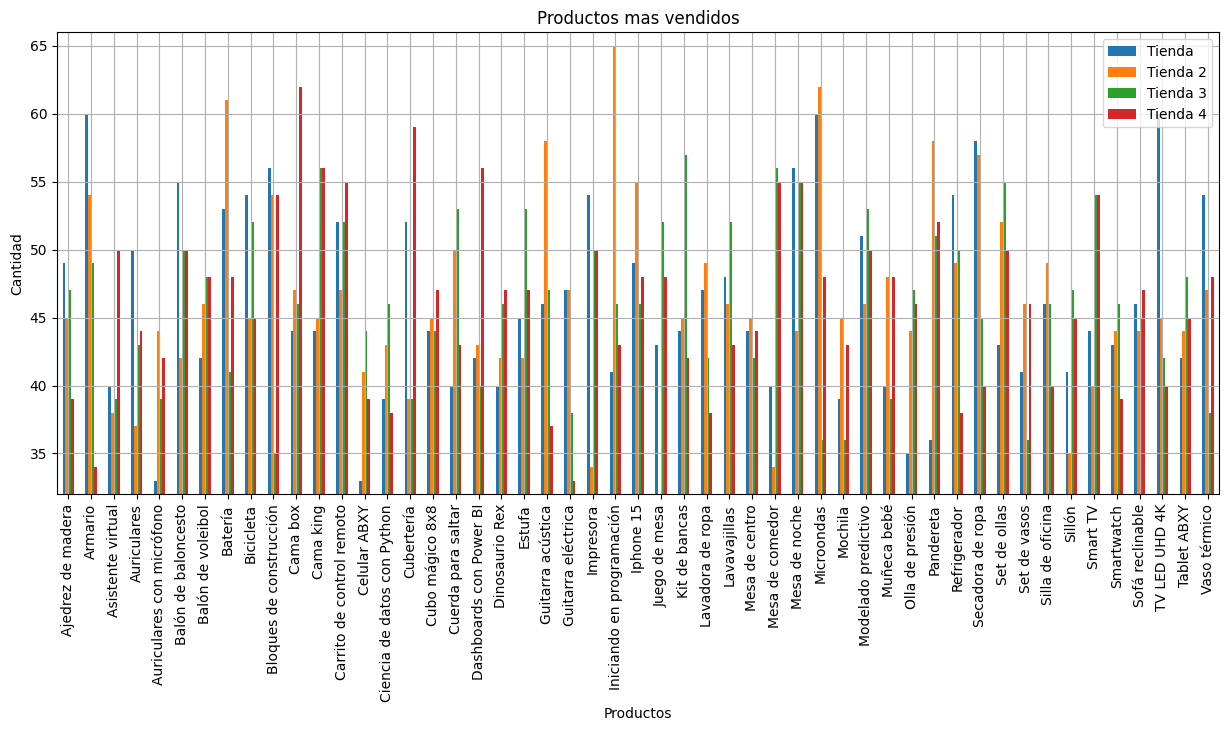

In [98]:
conteoProductos = lambda x: x['Producto'].value_counts()
productosContados = {"Tienda" : conteoProductos(tienda),
                          "Tienda 2" : conteoProductos(tienda2),
                          "Tienda 3" : conteoProductos(tienda3),
                         "Tienda 4" : conteoProductos(tienda4)}
productoMasVendido = {"Tienda" : productosContados['Tienda'].idxmax(),
                      "Tienda 2" : productosContados["Tienda 2"].idxmax(),
                      "Tienda 3" : productosContados["Tienda 3"].idxmax(),
                      "Tienda 4" : productosContados["Tienda 4"].idxmax()}
productoMenosVendidos = {"Tienda" : productosContados['Tienda'].idxmin(),
                         "Tienda 2" : productosContados["Tienda 2"].idxmin(),
                         "Tienda 3" : productosContados["Tienda 3"].idxmin(),
                         "Tienda 4" : productosContados["Tienda 4"].idxmin()}
dfProductoMenosVendidos = pd.DataFrame.from_dict(productoMenosVendidos, orient='index', columns=['❌ PRODUCTO MENOS VENDIDO POR TIENDA'])
print(dfProductoMenosVendidos)
dfProductosMasVendidos = pd.DataFrame.from_dict(productoMasVendido, orient='index', columns=['✅ PRODUCTO MAS VENDIDO POR TIENDA'])
print(dfProductosMasVendidos)

dfProductosContados = pd.DataFrame(productosContados)
dfProductosContados.plot(kind='bar', figsize=(15, 6))
plt.title("Productos mas vendidos")
plt.xlabel("Productos")
plt.ylim(32, 66)
plt.ylabel("Cantidad")
plt.grid(True)
plt.show()

# 5. Envío promedio por tienda

          💵 COSTO ENVIO PROMEDIO
Tienda              26018.609580
Tienda 2            25216.235693
Tienda 3            24805.680373
Tienda 4            23459.457167


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


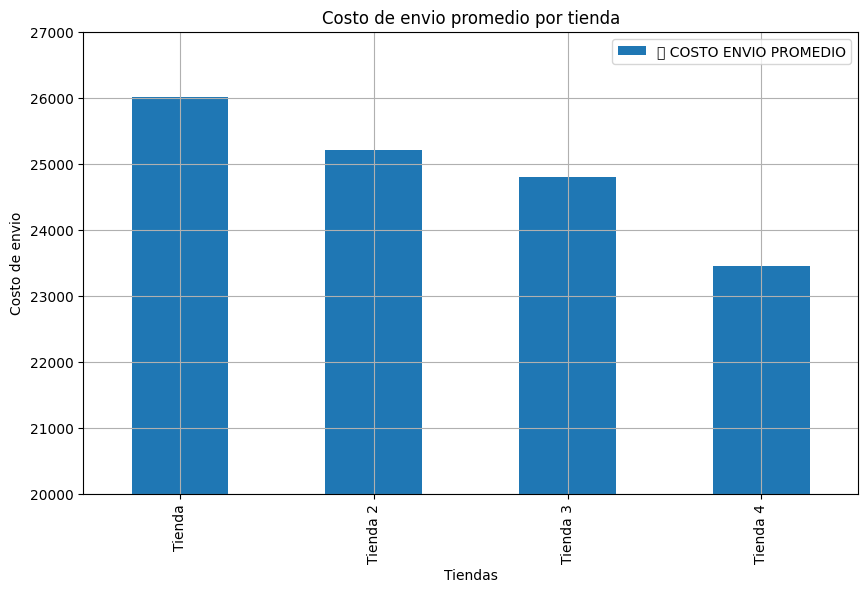

In [109]:
promedio = lambda x:x['Costo de envío'].sum()/len(x['Costo de envío'])
envioPromedio = {"Tienda" : promedio(tienda),
                "Tienda 2" : promedio(tienda2),
                "Tienda 3" : promedio(tienda3),
                "Tienda 4" : promedio(tienda4)}
dfPromedioCostoEnvio = pd.DataFrame.from_dict(envioPromedio, orient="index", columns=['💵 COSTO ENVIO PROMEDIO'])
print(dfPromedioCostoEnvio)

dfPromedioCostoEnvio.plot(kind='bar', figsize=(10, 6))
plt.title("Costo de envio promedio por tienda")
plt.xlabel("Tiendas")
plt.ylabel("Costo de envio")
plt.ylim(20000,27000)
plt.grid(True)
plt.show()